## Regression

In supervised learning, we have two types of models: regression and classification. If the outcome/predicted value is a number, its a regression problem.

For example, we want to use a flight's distance to predict the flight time. Since its a supervised learning, so we need some data with its labels for training. Luckily, we have it in `flightsDistanceDuration` CSV.

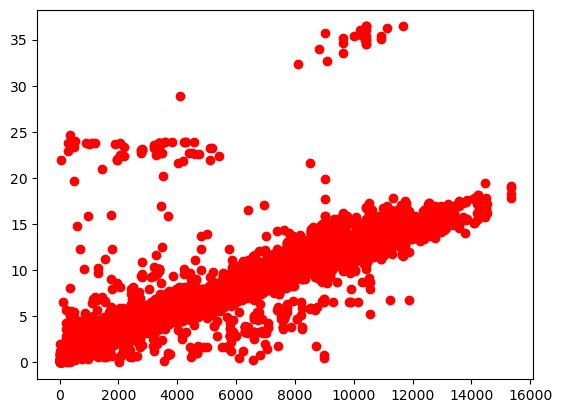

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

flightsData = pd.read_csv("flightsDistanceDuration.csv")

X = flightsData[["distance"]]
y = flightsData[["duration"]]

plt.plot(X, y, 'ro')

As you can clearly see, the data follows a linear relation. Distance and time are directly proportional, so hardly a surprise there. We can use the simplest ML model, **Linear Regression** here.

## Linear Regression

Linear regression uses the equation of a simple line

$$y'=mx+c$$

Using the fixed values of $m$ and $c$ (for a given line), we can predict the value of $y'$ by entering the value of respective $x$.

> $m$ and $c$ are fixed for a given line (linear regression model) and are known as parameters. Linear regression is a simple algorithm and hence has just two parameters. Complex/deep models like GPT-4 have billions of parameters.

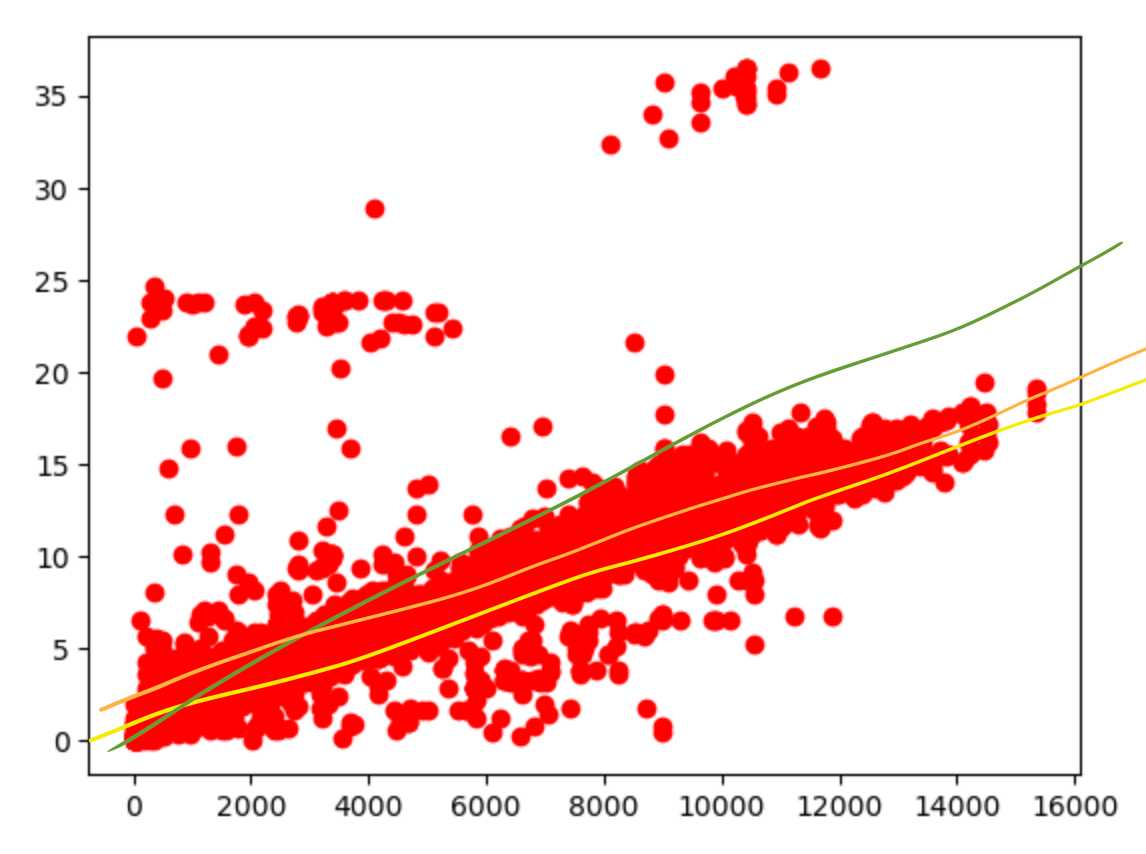
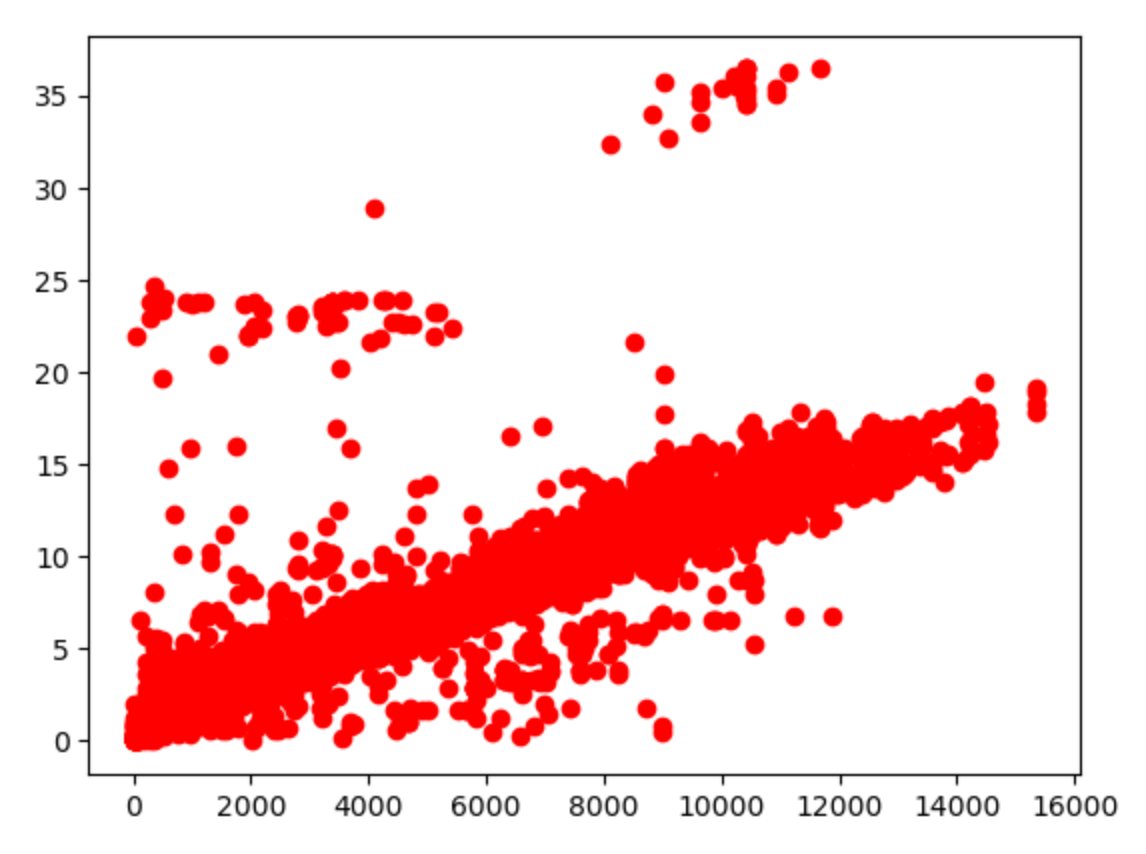

## Which Line is the Best one?

We have intuitively drawn some lines that look like a good representation of the data (pardon my poor straight line skills). But it's all intuitive/empirical and we have no way to confirm if the green line is better, orange or the yellow one. To check this, we need to calculate the error for each line and choose the one with the lowest error.

To calculate the error, we can simply take the difference between the actual value, $y$ and the predicted value, $y'$ for each data point (row) in our data and then sum all the errors.

$$Error = \sum_{i=1}^{n}(y'_i-y_i)$$

Let me explain it with a simple example (don't worry, I will come back to the flights data example soon). We have 3 data points, $x_1=1$, $x_2=2$ and $x_3=3$. The actual value of $y$ is $y_1=2$, $y_2=4$ and $y_3=6$.

And the linear regression model is $y' = 1.5x+2$. Since we are Python developers, so let's visualize it.

In [9]:
x = [1, 2, 3]
y = [2, 4, 6]
y_pred = [1.5*i+2 for i in x]

sampleData = pd.DataFrame({"x": x,"ý": y_pred, "y": y})
sampleData

,x,ý,y
0,1,3.5,2
1,2,5.0,4
2,3,6.5,6


And error will be $1.5+1+1.5 = 4$.

Since positive and negative errors can cancel out each other, we usually use the squared error. The squared error is defined as:

$$Error = \sum_{i=1}^{n}(y'_i-y_i)^2$$

This formula is called **Mean Squared Error** (MSE). There's just one thing missing, we need to divide the error by $n$ to get the average error. So the final formula becomes:

$$Error = \frac{1}{n}\sum_{i=1}^{n}(y'_i-y_i)^2$$

## Optimal Line

Now let's go back to the green, yellow and orange lines. The orange line has the lowest error, so it's the best model of our data... But wait a minute. Orange is better compared to green and yellow, but doesn't mean it's the best model. There can be some other line hiding somewhere, which is the best line.

So instead of checking things based on the intuition, we need to adopt a proper algorithmic solution.

Luckily, **optimization theory** is a whole field in engineering/Maths (one of my fav topics) and there are several optimization algorithms available. Lets use one of them.

## Gradient Descent - Intuition

If we plot Error with respect to the parameters – $m$ or $c$, it will follow a nice convex shape. Reason? Since it is a **convex function**. Convex functions have a single minima value and hence ideal for the optimization problems. No wonder why we chose square loss as our error function (it is a convex function).

Enough of this new mathematical jargons, lets plot it.

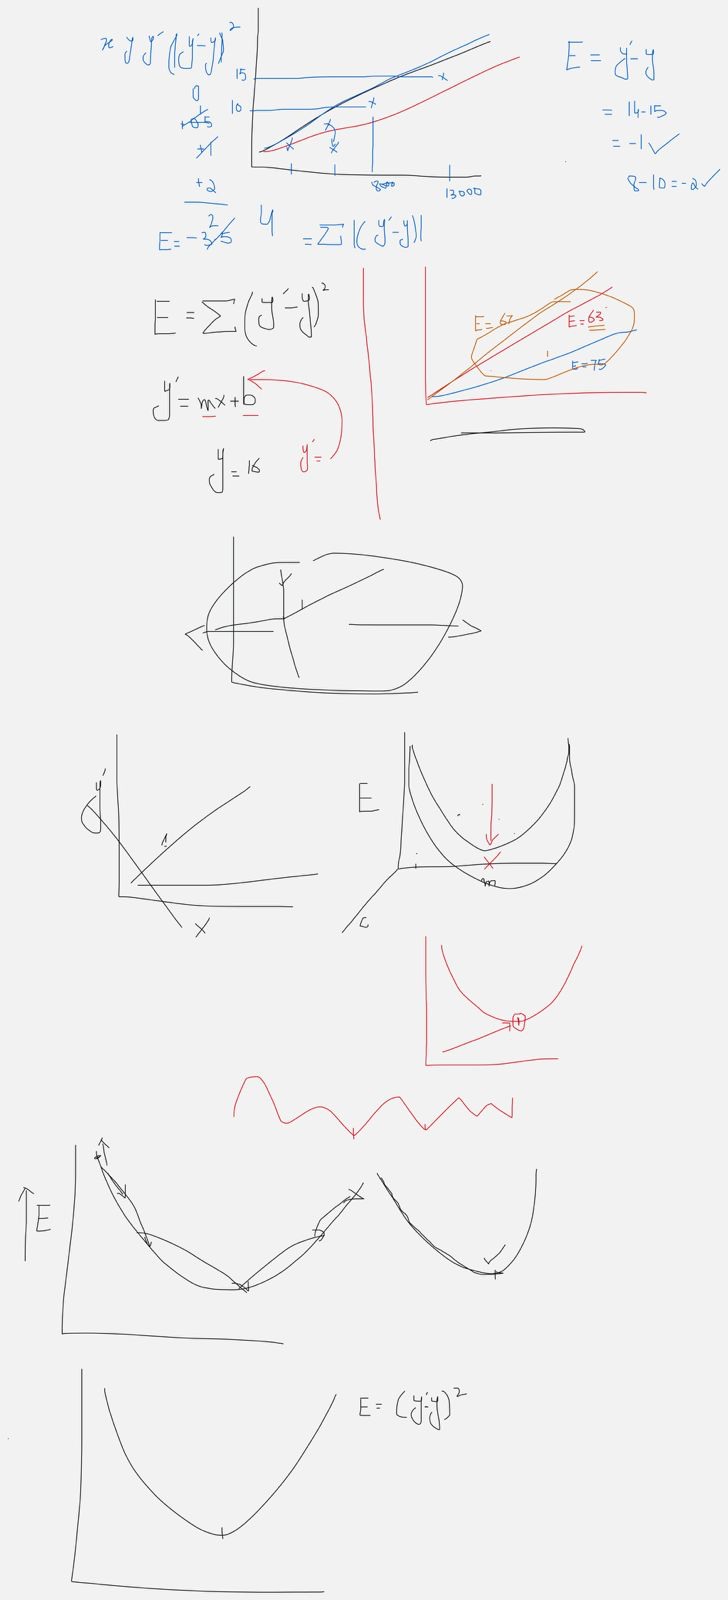

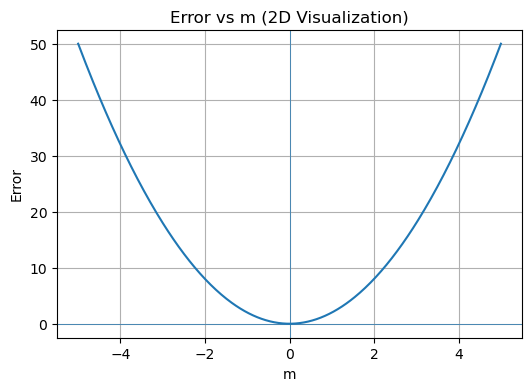

In [13]:
import numpy as np

def plot_convex_1d(a=1.0, b=0.0, c=0.0, x_range=(-5, 5), num_points=400):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = a * x**2 + b * x + c

    plt.figure(figsize=(6, 4))
    plt.plot(x, y)
    plt.axhline(0, linewidth=0.5)
    plt.axvline(0, linewidth=0.5)
    plt.title("Error vs m (2D Visualization)")
    plt.xlabel("m")
    plt.ylabel("Error")
    plt.grid(True)
    plt.show()

plot_convex_1d(a=2, b=0) # steeper bowl

Since line's equation demans both $m$ and $c$, we can plot it in 3D (will be a nice bowl).

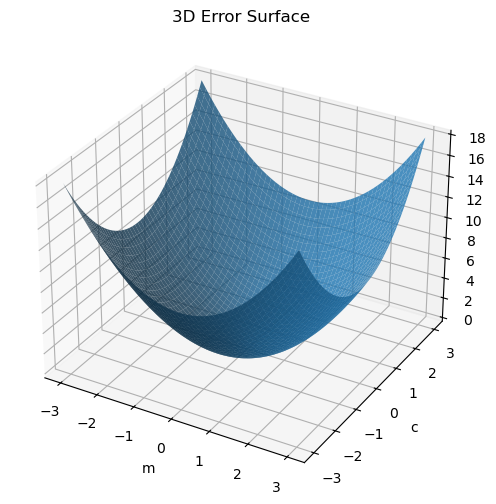

In [16]:
def plot_convex_bowl_2d(a=1.0, b=1.0, x_range=(-3, 3), y_range=(-3, 3), num_points=200):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)
    Z = a * X**2 + b * Y**2

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    ax.plot_surface(X, Y, Z, alpha=0.8)
    ax.set_title("3D Error Surface")
    ax.set_xlabel("m")
    ax.set_ylabel("c")
    ax.set_zlabel("E")

    plt.show()
plot_convex_bowl_2d()

For example, we start from say $m=2$ and $c=3$, we should probably decrease their values to reach the minima. But if we start from $m=-2$ and $c=-3$, we should instead *decrease* their values.

So, what should we do? Should we just give up or look for more solutions? Luckily, we see a clue that no matter where you are, this bowl's minimum point (where error is min) lies somewhere in the center and **the only way to go there is by descending**. So we will descend down the curve.

For descending, we just need to take the tangent/slope at each step and follow its negative direction. This is where a Calculus student will feel his/her "Eureka" moment as taking a function's slope/tangent is extremely easy: **just take its derivative**.

So we take the derivative of the error function at each step and descend. Hence, it's known as **Gradient Descent**.

## Gradient Descent - Algorithm

Now, lets formalize the algorithm. We will start with a random point, say $(m, c)$, and then we will follow the slope of the error function at each step.

$$m_{new} = m -  \frac{\partial E}{\partial m}$$
$$c_{new} = c -  \frac{\partial E}{\partial c}$$

 > When we take a derivative of a multivariate function, it's known as partial derivative. That's it.

Taking derivative of the error function with respect to $m$ gives us (_remember, summation and constant can be taken out of the derivative_):

$$\frac{\partial E}{\partial m} = \frac{\partial}{\partial m} \frac{1}{n}\sum_{i=1}^{n}(mx+c-y_i)^2$$
$$=\frac{2}{n}\sum_{i=1}^{n}(y'_i-y_i)(x)$$

Similarly, derivative wrt $c$ will be:

$$\frac{\partial E}{\partial m} = \frac{\partial}{\partial c} \frac{1}{n}\sum_{i=1}^{n}(mx+c-y_i)^2$$
$$=\frac{2}{n}\sum_{i=1}^{n}(y'_i-y_i)$$

---

Finally, our equations will become:

$$m_{new} = m -  \frac{2}{n}\sum_{i=1}^{n}(y'_i-y_i)(x)$$
$$c_{new} = c -  \frac{2}{n}\sum_{i=1}^{n}(y'_i-y_i)$$

---

Now, we can state the algorithm as:

1. Initialize $m$ and $c$ to some random values.
2. For each iteration:
    1. Calculate the gradient at the current point $(m, c)$.
    2. Update $m$ and $c$ using the gradient.
3. Once the algorithm terminates, we will have the optimal $m$ and $c$.

---

## Implementation

For a first time look, Maths and theory here may sound daunting to you. But don't worry, I will take all your questions and explain it briefly in the next class again. Lets make it a bit interesting and implement this algorithm in our fav Python.

> **Note:** The code below is written by chatGPT.

In [21]:
def plot_results(X, Y, m, c, losses,
                 point_color="blue",
                 line_color="red"):
    X = np.array(X, dtype=np.float64)
    Y = np.array(Y, dtype=np.float64)

    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = m * x_line + c

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ----- 1. Data + line -----
    ax1 = axes[0]
    ax1.scatter(X, Y, color=point_color, label="Data", alpha=0.8)
    ax1.plot(x_line, y_line, color=line_color, linewidth=2,
             label=f"Fit: y = {m:.2f}x + {c:.2f}")
    ax1.set_title("Linear Regression Fit")
    ax1.set_xlabel("X")
    ax1.set_ylabel("Y")
    ax1.legend()
    ax1.grid(True)

    # ----- 2. Loss vs iteration -----
    ax2 = axes[1]
    ax2.plot(losses, color="green")
    ax2.set_title("Loss vs Iteration (E)")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Loss (MSE)")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

In [22]:
def gradient_descent_linear_regression(X, Y, lr=0.01, epochs=500):
    """
    Performs gradient descent for y = m x + c with squared loss, with basic feature scaling
    and overflow protection.
    """
    # Convert to numpy arrays
    X = np.array(X, dtype=np.float64)
    Y = np.array(Y, dtype=np.float64)
    n = len(X)

    # ---- Scale X to avoid huge gradients ----
    x_mean = X.mean()
    x_std = X.std() if X.std() != 0 else 1.0  # avoid division by zero
    X_scaled = (X - x_mean) / x_std

    # Initialize parameters in scaled space
    m = 0.0
    c = 0.0

    losses = []

    for epoch in range(epochs):
        Y_pred = m * X_scaled + c
        error = Y_pred - Y

        # Mean Squared Error
        loss = 0.5 * np.mean(error ** 2)
        losses.append(loss)

        # Safety check: break if it blows up
        if not np.isfinite(loss):
            print(f"Stopped at epoch {epoch}: loss became non-finite (overflow / NaN).")
            break

        # Gradients
        dm = np.mean(error * X_scaled)
        dc = np.mean(error)

        # Update
        m -= lr * dm
        c -= lr * dc

    # Convert m,c back to original (unscaled X) form:
    # y = m_scaled * (x - x_mean)/x_std + c  =>  y = (m_scaled/x_std)*x + (c - m_scaled*x_mean/x_std)
    m_orig = m / x_std
    c_orig = c - m * x_mean / x_std

    return m_orig, c_orig, losses

Final parameters: m = 0.0011, c = 0.6843
Final loss      : 0.643219


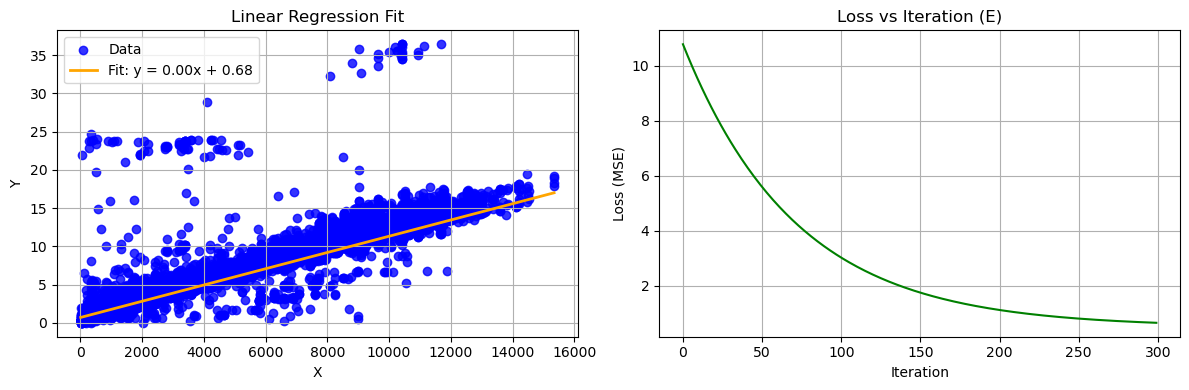

In [28]:
def run_gradient_descent_demo(X, Y, lr=0.01, epochs=500):
    m, c, losses = gradient_descent_linear_regression(X, Y, lr=lr, epochs=epochs)
    print(f"Final parameters: m = {m:.4f}, c = {c:.4f}")
    print(f"Final loss      : {losses[-1]:.6f}")
    plot_results(X, y_, m, c, losses,
             point_color="blue",
             line_color="orange")
    return m, c, losses


# Example usage
if __name__ == "__main__":
    X = flightsData[["distance"]]
    y_ = flightsData[["duration"]]

    run_gradient_descent_demo(X, y_, lr=0.007, epochs=300)